### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

### Importing and Visualizing dataset

In [2]:
data = pd.read_csv('./311_Service_Requests_from_2010_to_Present (1).csv')
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### Columns

In [3]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

### Renaming columns

In [4]:
data.columns = data.columns.str.replace(' ','_')

### Shape of data

In [5]:
data.shape

(364558, 53)

### Null values

In [6]:
data.isnull().mean()*100

Unique_Key                          0.000000
Created_Date                        0.000000
Closed_Date                         0.653120
Agency                              0.000000
Agency_Name                         0.000000
Complaint_Type                      0.000000
Descriptor                          1.783255
Location_Type                       0.036483
Incident_Zip                        0.822366
Incident_Address                   14.181283
Street_Name                        14.181283
Cross_Street_1                     15.686941
Cross_Street_2                     15.856187
Intersection_Street_1              85.977540
Intersection_Street_2              86.144317
Address_Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility_Type                       0.655314
Status                              0.000000
Due_Date                            0.000823
Resolution_Description              0.000000
Resolution

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique_Key                      364558 non-null  int64  
 1   Created_Date                    364558 non-null  object 
 2   Closed_Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency_Name                     364558 non-null  object 
 5   Complaint_Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location_Type                   364425 non-null  object 
 8   Incident_Zip                    361560 non-null  float64
 9   Incident_Address                312859 non-null  object 
 10  Street_Name                     312859 non-null  object 
 11  Cross_Street_1                  307370 non-null  object 
 12  Cross_Street_2  

## Exploratory analysis

### Null values count

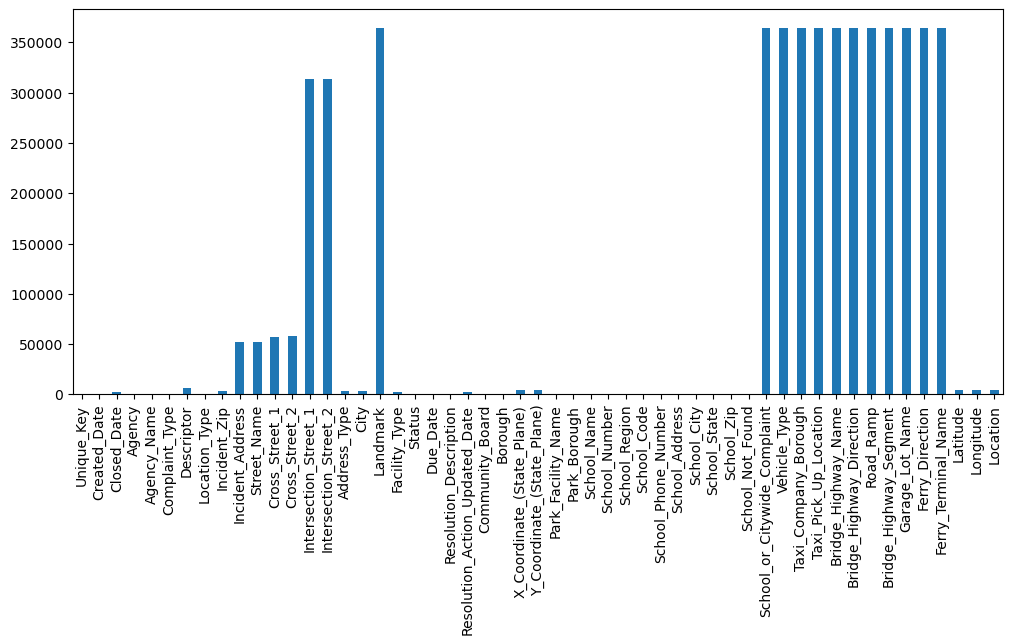

In [8]:
plt.figure(figsize=(12,5))
data.isnull().sum().plot.bar()
plt.show()

### Missing value treatment

#### Removing null values from Closed Date

In [9]:
data.Closed_Date.isnull().sum()

2381

In [10]:
data.dropna(subset=['Closed_Date'],inplace=True)

In [11]:
data.Closed_Date.isnull().sum()

0

###  Calculate the time elapsed in closed and creation date

In [12]:
data['Created_Date'] = pd.to_datetime(data['Created_Date'],errors='ignore')

In [13]:
data['Closed_Date'] = pd.to_datetime(data['Closed_Date'],errors='ignore')

In [14]:
data['Elapsed_Time'] =data['Closed_Date'] - data['Created_Date']

### Elapsed time to seconds

In [15]:
data['Elapsed_Time_sec'] = data['Elapsed_Time'].dt.seconds

In [16]:
data.head(5)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Elapsed_Time,Elapsed_Time_sec
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,3330
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,5233
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34,17494
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27,27927
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44,12464


### Descriptive statistics for elapsed time seconds column

In [17]:
data.Elapsed_Time_sec.describe()

count    362177.000000
mean      13898.326843
std       13631.143892
min           1.000000
25%        4509.000000
50%        9539.000000
75%       18613.000000
max       86399.000000
Name: Elapsed_Time_sec, dtype: float64

### Null values in Complaint type and City columns

In [18]:
data.Complaint_Type.isnull().sum()

0

In [19]:
data.City.isnull().sum()

674

### Impute NA value with Unknown City

In [20]:
data.City.replace(np.nan,'Unknown City',inplace=True)

In [21]:
data.City.isnull().sum()

0

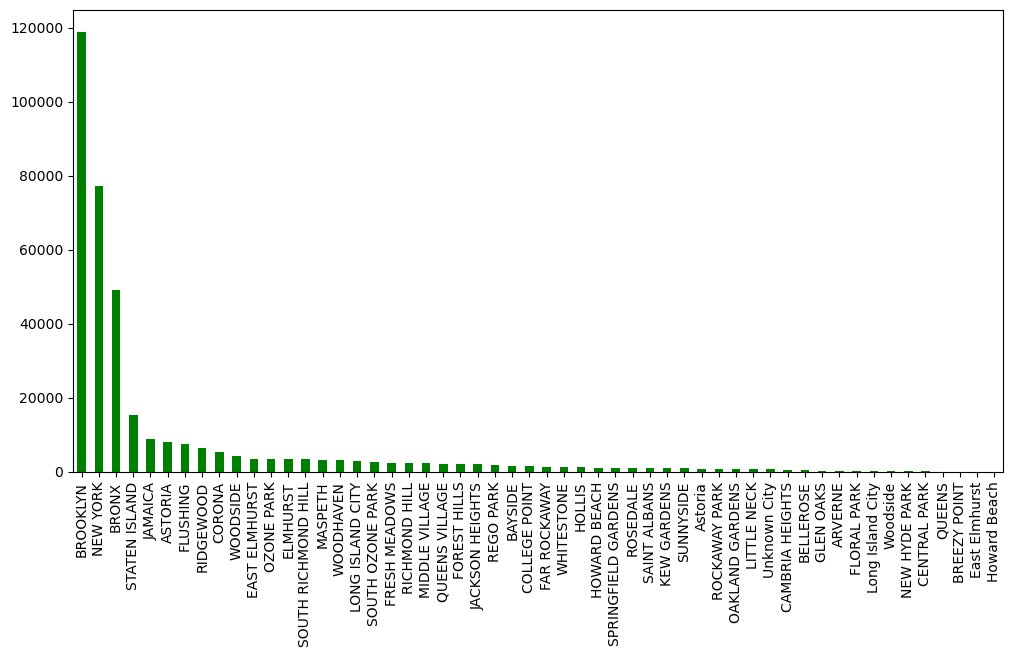

In [22]:
### Complaints by city
complaints_by_city = data.City.value_counts()
plt.figure(figsize=(12,6))
complaints_by_city.plot(kind='bar',color='green')
plt.show()

In [23]:
palette = itertools.cycle(sns.color_palette())

### Scatter plot for concentration of complaints across Brooklyn

### Hexbin plot of concentration of complaints across Brooklyn

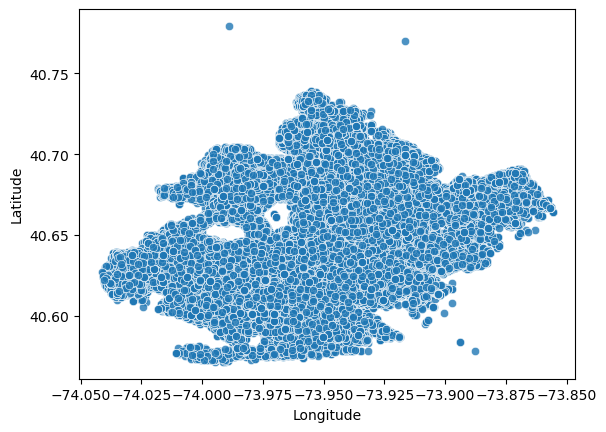

In [24]:
brooklyn = data.query("City=='BROOKLYN'")
sns.scatterplot(data=brooklyn,x='Longitude',y='Latitude',\
                alpha=.8,color=next(palette))
plt.show()

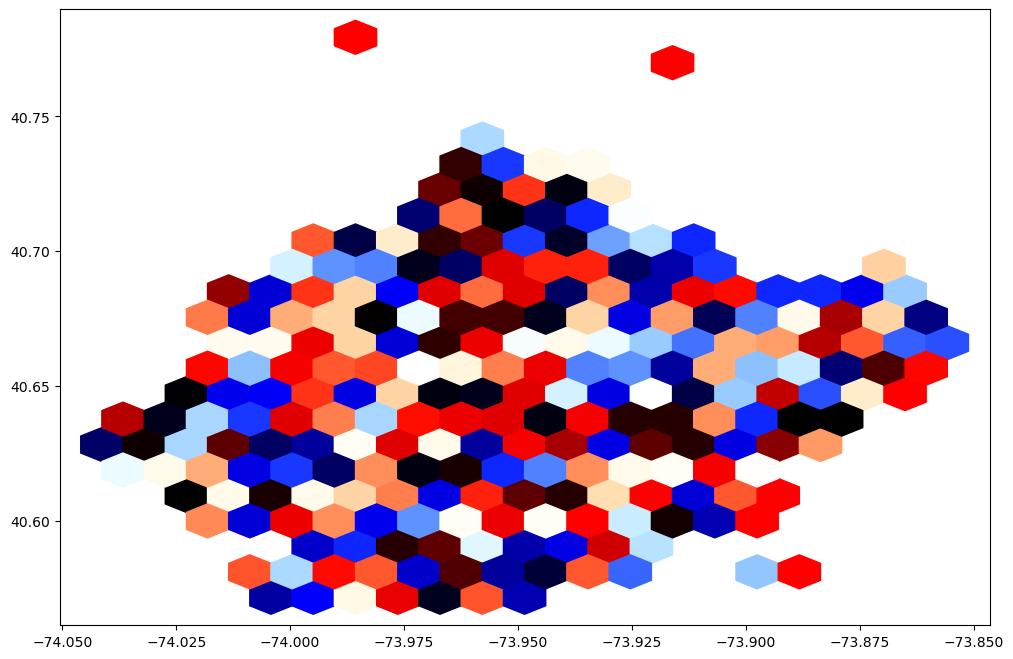

In [25]:
plt.figure(figsize=(12,8))
plt.hexbin(data=brooklyn,x='Longitude',y='Latitude',cmap='flag',\
           gridsize=20,bins='log',mincnt=1)
plt.show()

## Major types of complaints

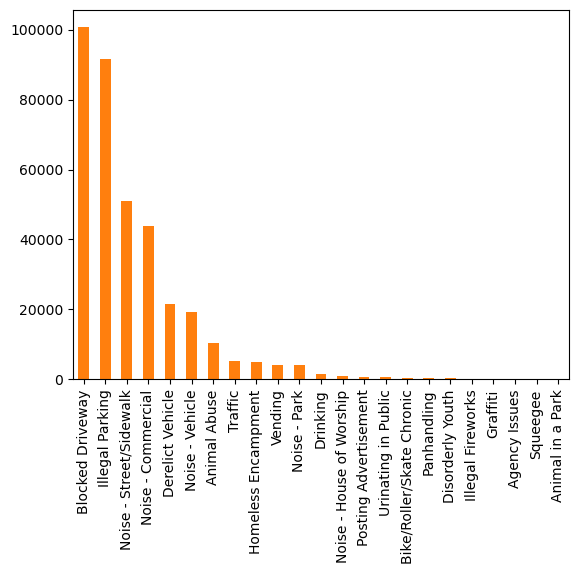

In [26]:
## Types of complaints
complaint = data.Complaint_Type.value_counts()
complaint.plot(kind='bar',color=next(palette))
plt.show()

### Top 10 Complaint types

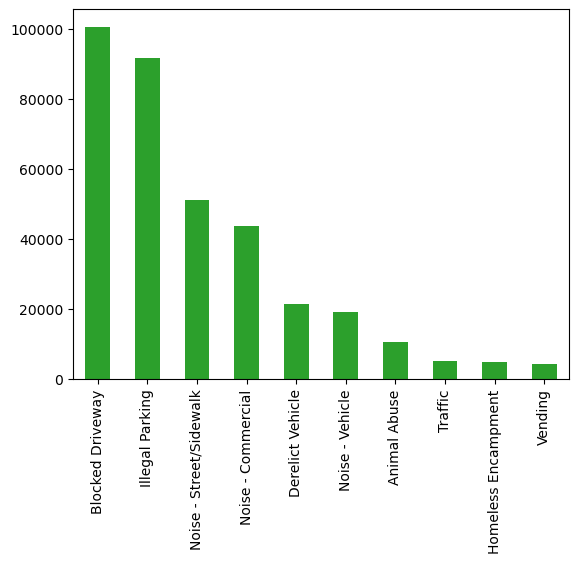

In [27]:
complaint.nlargest(10)
complaint.nlargest(10).plot(kind='bar',color=next(palette))
plt.show()

### Various type of complaints in New York

In [28]:
newyork_complaint = data.query("City=='NEW YORK'")

In [29]:
var_complaint=newyork_complaint.Complaint_Type.value_counts()

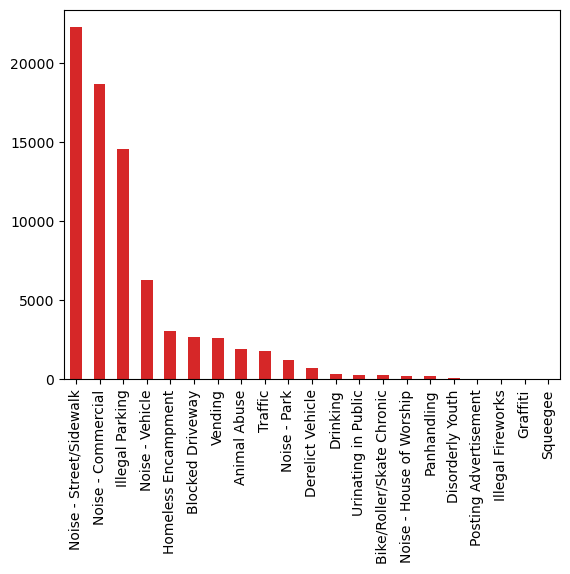

In [30]:
var_complaint.plot(kind='bar',color = next(palette))
plt.show()

### Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [42]:
data_new = pd.crosstab(data.City, data.Complaint_Type, margins=True)
data_new.reset_index()
data_new.head()

Complaint_Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending,All
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,46,0,0,50,32,2,1,1,4,...,2,29,10,1,0,0,1,1,1,259
ASTORIA,0,170,0,16,3436,426,5,43,4,32,...,64,409,236,2,3,0,60,10,57,7991
Astoria,0,0,0,0,159,14,0,0,0,0,...,0,145,0,0,0,0,0,0,0,905
BAYSIDE,0,53,0,0,514,231,2,1,3,2,...,4,17,24,0,0,0,9,0,2,1550
BELLEROSE,0,15,0,1,138,120,2,1,0,1,...,1,13,11,1,1,0,9,1,0,487


In [34]:
data_new.loc['ARVERNE']

Complaint_Type
Agency Issues                  0
Animal Abuse                  46
Animal in a Park               0
Bike/Roller/Skate Chronic      0
Blocked Driveway              50
Derelict Vehicle              32
Disorderly Youth               2
Drinking                       1
Graffiti                       1
Homeless Encampment            4
Illegal Fireworks              0
Illegal Parking               62
Noise - Commercial             2
Noise - House of Worship      14
Noise - Park                   2
Noise - Street/Sidewalk       29
Noise - Vehicle               10
Panhandling                    1
Posting Advertisement          0
Squeegee                       0
Traffic                        1
Urinating in Public            1
Vending                        1
Total_complaints             259
Name: ARVERNE, dtype: int64

In [32]:
data_new.rename(columns={'All':'Total_complaints'},inplace=True)

In [38]:
data_new.sort_values(by='Total_complaints', ascending=False, inplace=True)

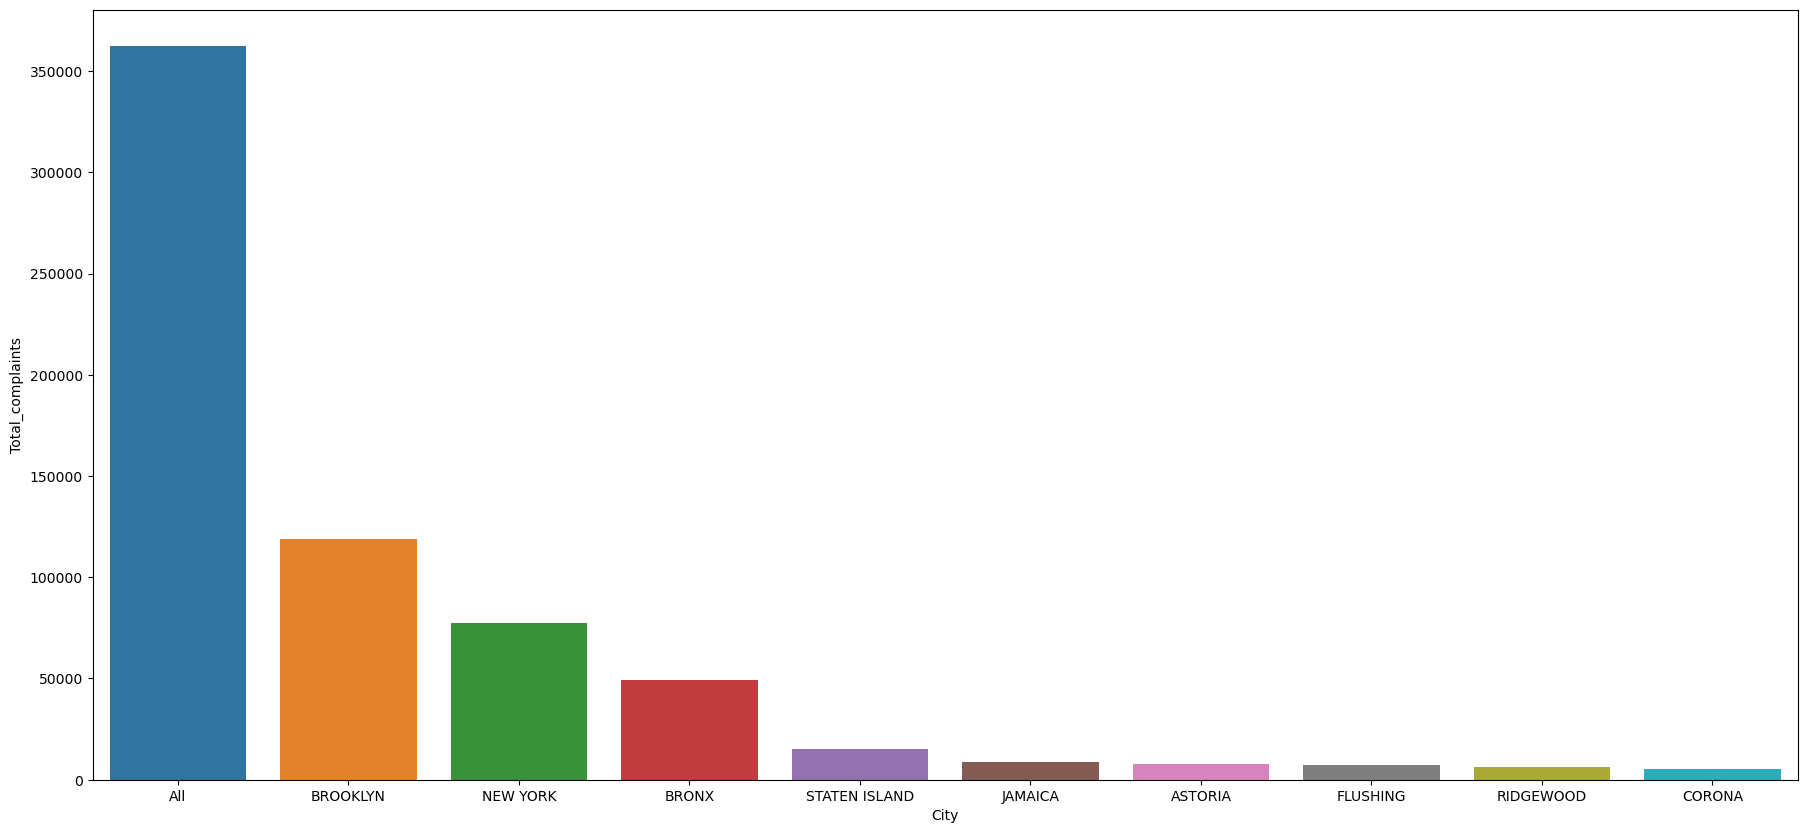

In [40]:
plt.figure(figsize=(22, 10))
sns.barplot(x=data_new.index[:10], y=data_new.Total_complaints[:10])
plt.show()

### Complaints in each city

In [ ]:
plt.figure(figsize=(12,5))
pd.crosstab(data.Complaint_Type,data.City).plot.bar()
plt.legend(bbox_to_anchor=(1,1))
plt.show()